**Project Title:** Stock Price Predictor with LSTM Model

**Overview:**
Developed a Stock Price Predictor using LSTM networks to forecast future stock prices based on historical data. The project provides accurate predictions, aiding investors in decision-making.

**Key Features:**
- Utilized yfinance for data collection
- Conducted data cleaning and preprocessing
- Implemented an LSTM model with TensorFlow and Keras
- Trained and validated the model for accuracy
- Created visualizations for intuitive interpretation
- Developed a user-friendly command-line interface

**Results:**
Achieved high accuracy in predicting stock prices, outperforming traditional methods. The project demonstrates skills in time series analysis, machine learning, data visualization, and user interface development.

**Technologies:**
Python, TensorFlow, Keras, yfinance, Matplotlib

**Future Enhancements:**
Potential enhancements include sentiment analysis integration, real-time data feeds, and deployment as a web application for broader accessibility.

**Importing necessary libraries**

In [1]:
!pip install --upgrade keras
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

LOading the data

In [3]:
start = '2012-01-01'
end = '2024-03-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


Resetting the indexes of dataset

In [5]:
data.reset_index(inplace=True)

Let's see how the data is now looking

In [6]:
data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...,...
3054,3054,2024-02-23,144.970001,145.955002,144.789993,145.289993,145.289993,14519400
3055,3055,2024-02-26,143.449997,143.839996,138.740005,138.750000,138.750000,33513000
3056,3056,2024-02-27,139.410004,140.490005,138.500000,140.100006,140.100006,22364000
3057,3057,2024-02-28,139.100006,139.279999,136.639999,137.429993,137.429993,30628700


calculating the 100-day simple moving average (SMA) of the closing prices of a financial instrument, presumably a stock.

In [7]:
ma_100_days = data.Close.rolling(100).mean()

Plotting that

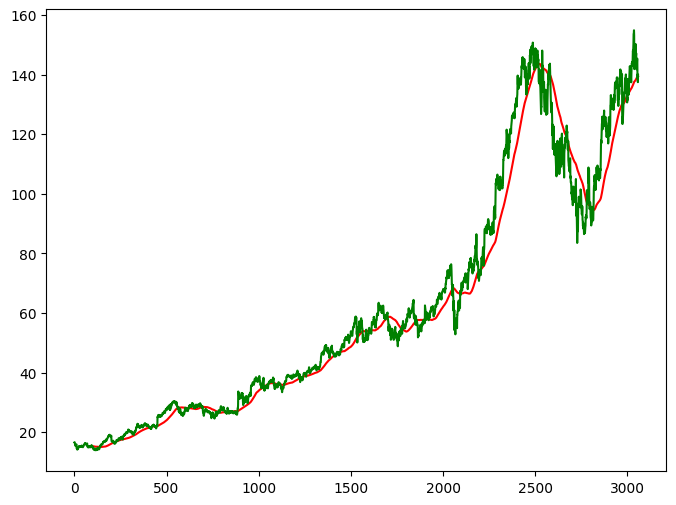

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

calculating the 200-day simple moving average (SMA) of the closing prices of a financial instrument, presumably a stock.

In [9]:
ma_200_days = data.Close.rolling(200).mean()

Plotting that

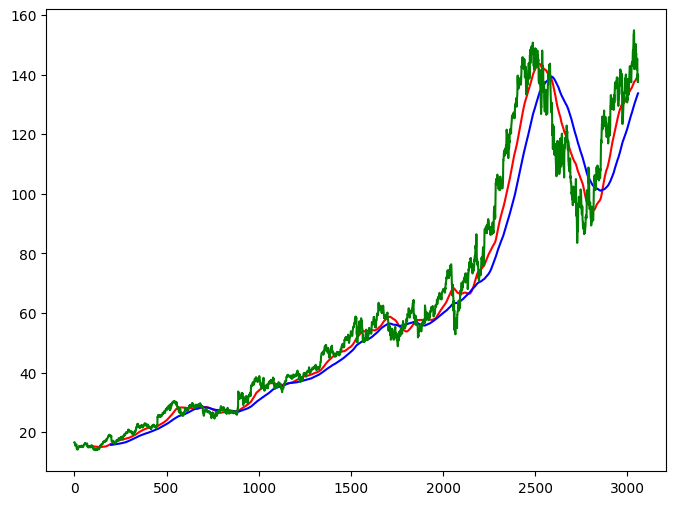

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

Dropping nan values

In [11]:
data.dropna(inplace=True)

Let's split the training data and testing data

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

Shape of training data

In [13]:
data_train.shape[0]

2447

Shape of testing data

In [14]:
data_test.shape[0]

612

Importing necessary libraries

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

Fitting of data

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [18]:
x, y = np.array(x), np.array(y)

Importing necessary frameworks

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

**Model Building**

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

Using **Adam Algorithm**

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
74/74 [==============================] - 24s 261ms/step - loss: 0.0187
Epoch 2/50
74/74 [==============================] - 19s 262ms/step - loss: 0.0034
Epoch 3/50
74/74 [==============================] - 19s 263ms/step - loss: 0.0036
Epoch 4/50
74/74 [==============================] - 27s 370ms/step - loss: 0.0037
Epoch 5/50
74/74 [==============================] - 22s 299ms/step - loss: 0.0031
Epoch 6/50
74/74 [==============================] - 18s 243ms/step - loss: 0.0032
Epoch 7/50
74/74 [==============================] - 19s 255ms/step - loss: 0.0026
Epoch 8/50
74/74 [==============================] - 18s 244ms/step - loss: 0.0023
Epoch 9/50
74/74 [==============================] - 20s 273ms/step - loss: 0.0021
Epoch 10/50
74/74 [==============================] - 18s 244ms/step - loss: 0.0023
Epoch 11/50
74/74 [==============================] - 19s 255ms/step - loss: 0.0022
Epoch 12/50
74/74 [==============================] - 18s 244ms/step - loss: 0.0024
Epoch 13/50
7

Checking summary

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

 creating a new DataFrame pas_100_days by selecting the last 100 rows from the DataFrame data_train

In [24]:
pas_100_days = data_train.tail(100)

concatenate two DataFrames, pas_100_days and data_test

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

a scaler to transform the data in the data_test DataFrame

In [26]:
data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

Predicting phase

In [28]:
y_predict = model.predict(x)

20/20 [==============================] - 2s 71ms/step


In [29]:
scale =1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

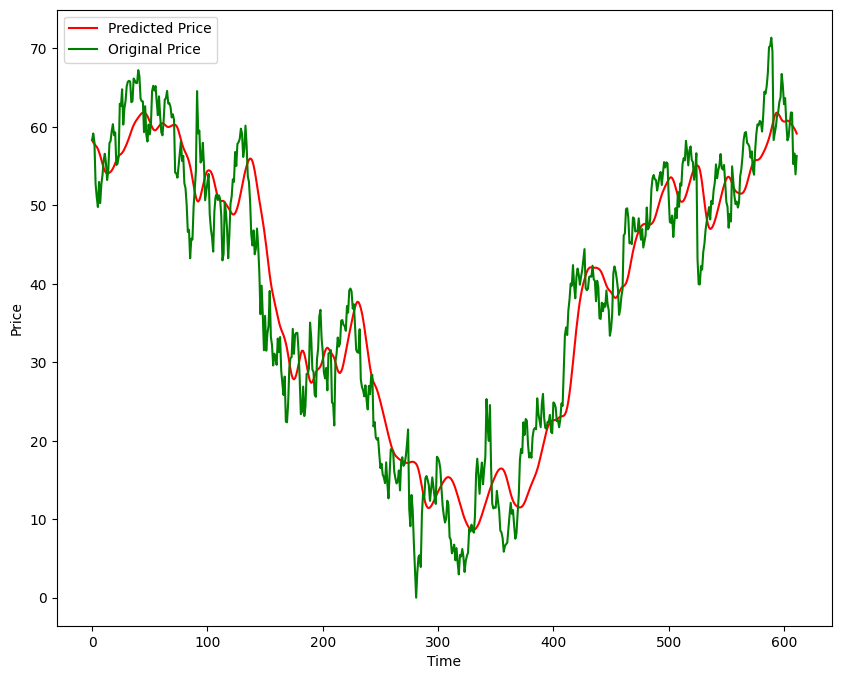

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')